In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

import pandas as pd
import pickle

<Figure size 960x640 with 0 Axes>

In [2]:
import pickle
with open('df_image_size.pkl', 'rb') as f:
	df = pickle.load(f)

print(df.head(10))
print(df['shape_x'].size)
print(df.dtypes)

  State Village_code_2001 Village_code_2011  Image_size  shape_x  shape_y
0    SK              1000            260935    (80, 81)       80       81
1    SK               100            260925  (313, 201)      313      201
2    SK             10100            261027  (102, 104)      102      104
3    SK             10200            261028   (101, 85)      101       85
4    SK             10300            261029  (127, 146)      127      146
5    SK             10400            261030  (115, 172)      115      172
6    SK             10500            261031  (127, 180)      127      180
7    SK             10600            261032    (84, 86)       84       86
8    SK             10700            261033   (117, 82)      117       82
9    SK             10800            261034  (118, 127)      118      127
482238
State                object
Village_code_2001    object
Village_code_2011    object
Image_size           object
shape_x               int64
shape_y               int64
dtype: obje

In [3]:
print(df['shape_x'].describe())
print(df['shape_y'].describe())

count    482238.000000
mean         77.890606
std          62.041508
min           1.000000
25%          39.000000
50%          68.000000
75%         105.000000
max        1952.000000
Name: shape_x, dtype: float64
count    482238.000000
mean         85.564267
std          66.449256
min           1.000000
25%          44.000000
50%          75.000000
75%         115.000000
max        2307.000000
Name: shape_y, dtype: float64


In [4]:
shape_x = list(df['shape_x'])
shape_y = list(df['shape_y'])

In [5]:
x_new = df[df['shape_x'] > 20]
x_new = x_new[x_new['shape_y'] > 20]
print(x_new.head())
print(x_new['shape_x'].size)

print(x_new['shape_x'].describe())
print(x_new['shape_y'].describe())

  State Village_code_2001 Village_code_2011  Image_size  shape_x  shape_y
0    SK              1000            260935    (80, 81)       80       81
1    SK               100            260925  (313, 201)      313      201
2    SK             10100            261027  (102, 104)      102      104
3    SK             10200            261028   (101, 85)      101       85
4    SK             10300            261029  (127, 146)      127      146
410809
count    410809.000000
mean         90.361475
std          58.622581
min          21.000000
25%          52.000000
50%          77.000000
75%         113.000000
max        1952.000000
Name: shape_x, dtype: float64
count    410809.000000
mean         99.194470
std          62.331536
min          21.000000
25%          58.000000
50%          85.000000
75%         124.000000
max        2307.000000
Name: shape_y, dtype: float64


D:\Users\HariOmAhlawat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

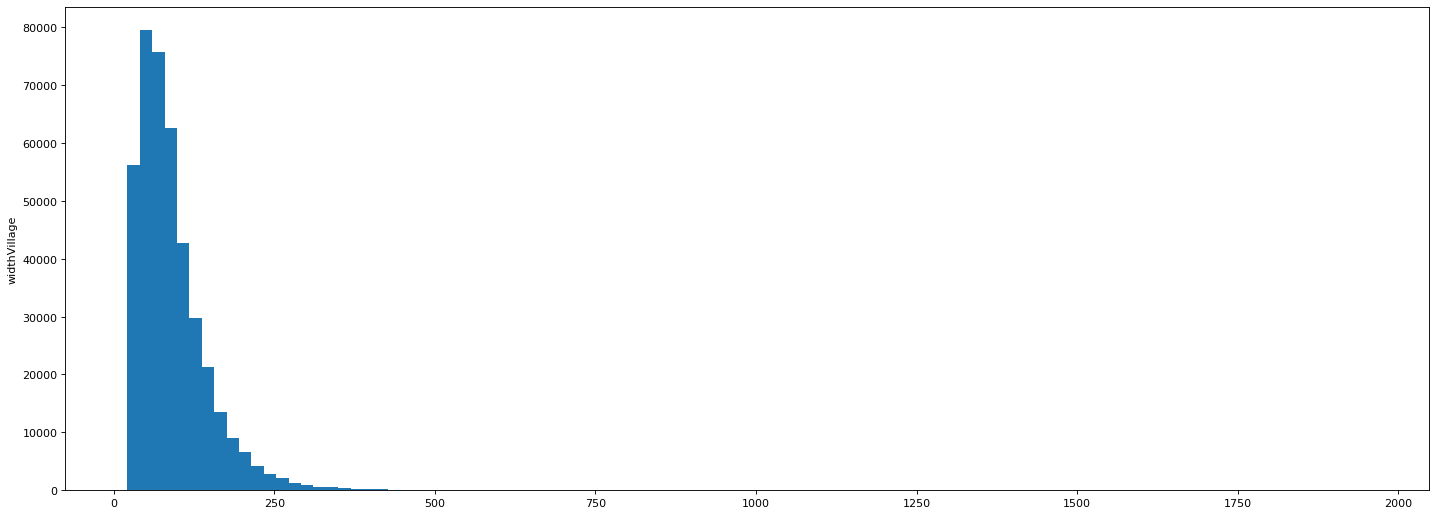

In [16]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(22, 8), dpi=80, facecolor='w', edgecolor='k')

width_list = x_new['shape_x']
plt.hist(width_list, normed=False, bins=100)
plt.ylabel('widthVillage')
plt.show

D:\Users\HariOmAhlawat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'heightVillage')

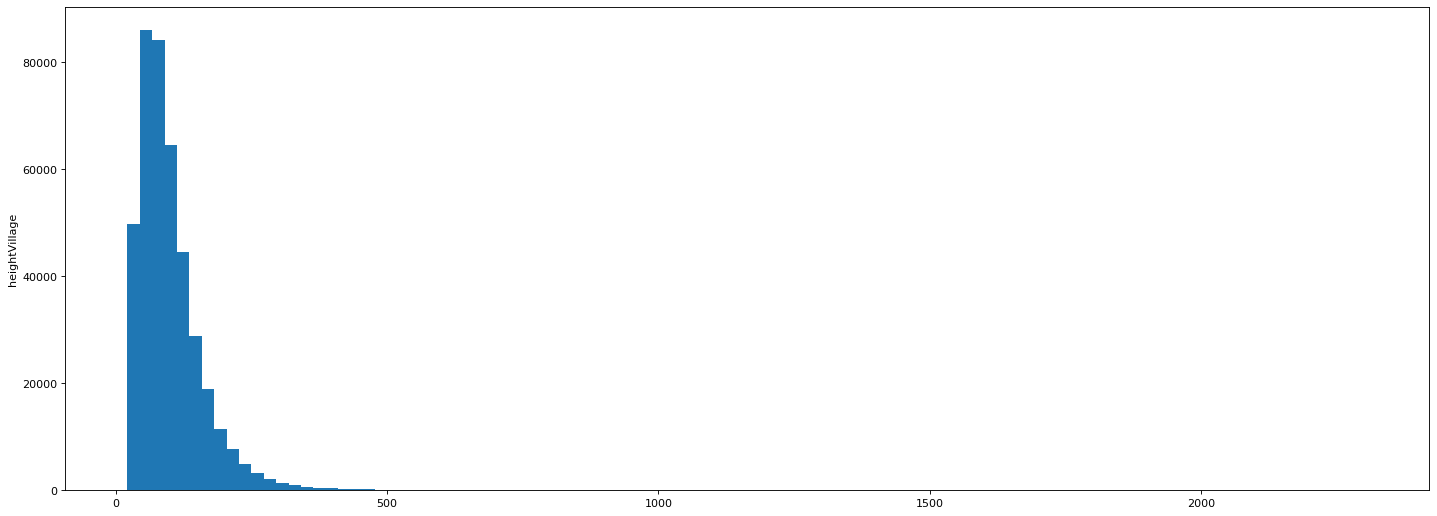

In [17]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(22, 8), dpi=80, facecolor='w', edgecolor='k')

width_list = x_new['shape_y']
plt.hist(width_list, normed=False, bins=100)
plt.ylabel('heightVillage')

In [40]:
shape_xy = df['Image_size']
count=0
for i in shape_xy:
    if i[0]<=30 and i[1]<=30:
        count+=1

print(count)        

72163


less than 50 :  191765
50 to 100 :  254045
100 to 150 :  144541
150 to 200 :  59104
200 to 250 :  22643
250 to 300 :  8900
more than 300 :  6214


<function matplotlib.pyplot.show(*args, **kw)>

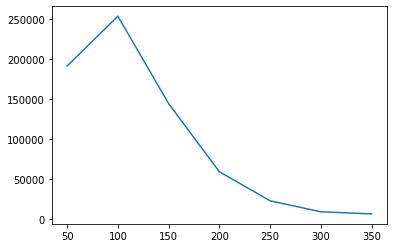

In [12]:
shape_xy = df['Image_size']
count50 = 0
count100 = 0
count150 = 0
count200 = 0
count250 = 0
count300 = 0
count300plus=0

for i in shape_xy:
    if i[0]<=50 or i[1]<=50:
        count50+=1
    if ((i[0]>50 and i[0]<100) or (i[1]>=50 and i[1]<100)):
        count100+=1
    if ((i[0]>100 and i[0]<150) or (i[1]>=100 and i[1]<150)):
        count150+=1
    if ((i[0]>150 and i[0]<200) or (i[1]>=150 and i[1]<200)):
        count200+=1
    if ((i[0]>200 and i[0]<250) or (i[1]>=200 and i[1]<250)):
        count250+=1
    if ((i[0]>250 and i[0]<300) or (i[1]>=250 and i[1]<300)):
        count300+=1
    if i[0]>=300 or i[1]>=300:
        count300plus+=1
        
print('less than 50 : ',count50)
print('50 to 100 : ',count100)
print('100 to 150 : ',count150)
print('150 to 200 : ',count200)
print('200 to 250 : ',count250)
print('250 to 300 : ',count300)
print('more than 300 : ',count300plus)

x = [count50, count100, count150, count200, count250, count300, count300plus]
y = [50,100,150,200,250,300,350]
plt.plot(y,x)
plt.show

less than 50 :  119983
50 to 100 :  107325
100 to 150 :  35296
150 to 200 :  9395
200 to 250 :  2563
250 to 300 :  788
more than 300 :  1684


<function matplotlib.pyplot.show(*args, **kw)>

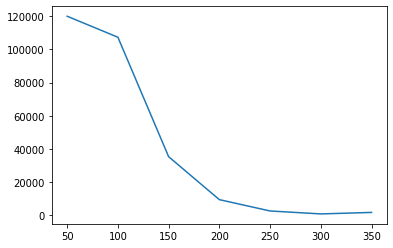

In [14]:
shape_xy = df['Image_size']
count50 = 0
count100 = 0
count150 = 0
count200 = 0
count250 = 0
count300 = 0
count300plus=0

for i in shape_xy:
    if i[0]<=50 and i[1]<=50:
        count50+=1
    if ((i[0]>50 and i[0]<100) and (i[1]>=50 and i[1]<100)):
        count100+=1
    if ((i[0]>100 and i[0]<150) and (i[1]>=100 and i[1]<150)):
        count150+=1
    if ((i[0]>150 and i[0]<200) and (i[1]>=150 and i[1]<200)):
        count200+=1
    if ((i[0]>200 and i[0]<250) and (i[1]>=200 and i[1]<250)):
        count250+=1
    if ((i[0]>250 and i[0]<300) and (i[1]>=250 and i[1]<300)):
        count300+=1
    if i[0]>=300 and i[1]>=300:
        count300plus+=1
        
print('less than 50 : ',count50)
print('50 to 100 : ',count100)
print('100 to 150 : ',count150)
print('150 to 200 : ',count200)
print('200 to 250 : ',count250)
print('250 to 300 : ',count300)
print('more than 300 : ',count300plus)

x = [count50, count100, count150, count200, count250, count300, count300plus]
y = [50,100,150,200,250,300,350]
plt.plot(y,x)
plt.show